In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [142]:
ttbar = Tree(
    [
        '/store/user/ekoenig/6BAnalysis/NTuples/2018/preselection/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple_0.root'
    ]
)

100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:label='ttbar', xlabel='genWeight Sign', ylabel='PDF'>,
 <utils.plotUtils.histogram.Histo at 0x7fdb1dd1d4f0>)

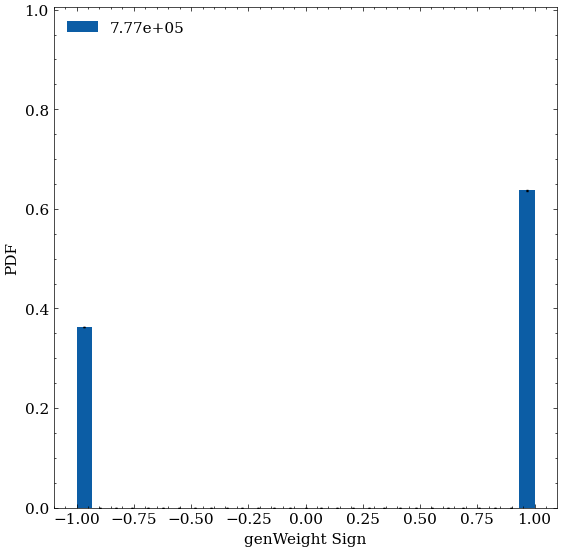

In [149]:
histo_array(np.sign(ttbar.genWeight), efficiency=True, xlabel='genWeight Sign', label='ttbar', legend=True)

In [138]:
from utils.rootUtils.TEfficiency import TEfficiency

fname = '/uscms_data/d3/ekoenig/8BAnalysis/analysis/CMSSW_10_6_28/src/MultiHiggs/analysis/MultiHAnalysis/data/btag/efficiency/sixb/eff_wp_deepJet_2018.root'
teff = TEfficiency.from_root(fname, 'eff/medium_hf5_jet_pt_eta')

(<Figure size 650x650 with 2 Axes>, <AxesSubplot:>)

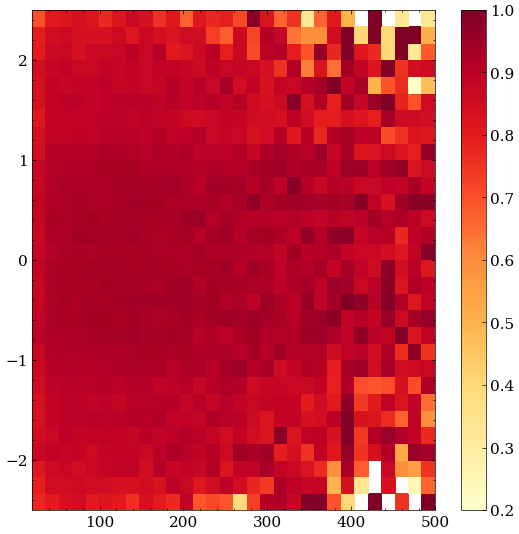

In [139]:
h = Histo2D(teff.eff, teff.xbins, teff.ybins)
plot_histo2d(h, colorbar=True)

In [71]:
valid_eff = (teff.eff > 0) & (teff.eff < 1)

In [85]:
X, Y = np.meshgrid(teff.xcenters, teff.ycenters, indexing='ij')

flat_eff = teff.eff[valid_eff]
flat_x = X[valid_eff]
flat_y = Y[valid_eff]

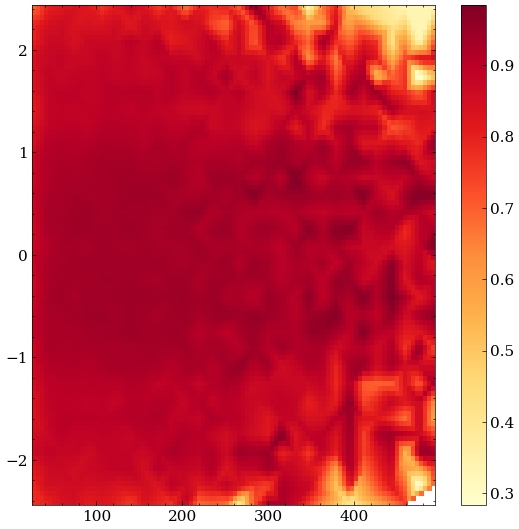

In [106]:
_,_,g_eff = graph2d_array(flat_x, flat_y, flat_eff, interp=True, colorbar=True)

In [107]:
interp_eff = g_eff.f_interp(X, Y)

In [108]:
interp_eff[np.isnan(interp_eff)] = 0

In [109]:
interp_eff

array([[0.77370031, 0.78838451, 0.81718062, 0.86626984, 0.85300587,
        0.83196441, 0.83591731, 0.85798185, 0.86613021, 0.87025535,
        0.89489554, 0.88633831, 0.87598191, 0.87321792, 0.88333333,
        0.87803669, 0.86782155, 0.87556186, 0.883673  , 0.87463622,
        0.87761049, 0.84814627, 0.8405094 , 0.80652759, 0.83395383,
        0.83738318, 0.8456985 , 0.79967069, 0.79487179, 0.69926393],
       [0.79819495, 0.85507862, 0.86549708, 0.89087275, 0.87360217,
        0.88299278, 0.89009024, 0.89528596, 0.91068404, 0.92411721,
        0.92249795, 0.92637598, 0.92713016, 0.92610203, 0.92357724,
        0.91318494, 0.92771698, 0.92863459, 0.92239868, 0.91372124,
        0.91405566, 0.90767497, 0.88762024, 0.88559993, 0.88688972,
        0.8868505 , 0.87512168, 0.86638537, 0.84672686, 0.80333592],
       [0.84102691, 0.85296966, 0.86909735, 0.87950844, 0.89770609,
        0.89739996, 0.8956959 , 0.90041038, 0.91422313, 0.92039181,
        0.92304184, 0.92823993, 0.93452107, 0.

In [110]:
np.where( np.isnan(interp_eff) )

(array([], dtype=int64), array([], dtype=int64))

In [111]:
np.min(interp_eff), np.max(interp_eff)

(0.0, 0.990909090909091)

(<Figure size 650x650 with 2 Axes>,
 <AxesSubplot:>,
 <utils.plotUtils.graph2d.Graph2D at 0x7fdb2a84b7c0>)

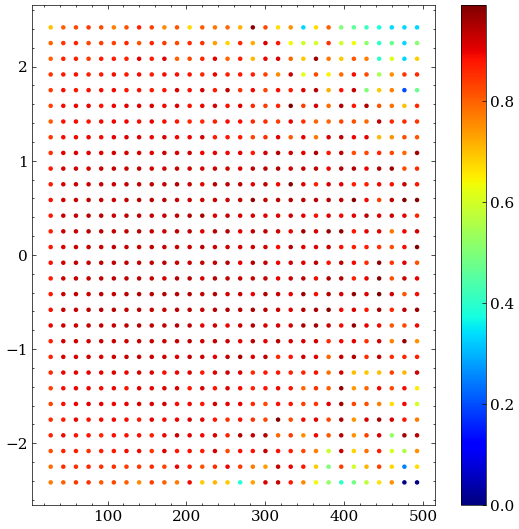

In [112]:
graph2d_array(X, Y, interp_eff, colorbar=True)

In [69]:
np_eff

array([[0.77370031, 0.78838451, 0.81718062, 0.86626984, 0.85300587,
        0.83196441, 0.83591731, 0.85798185, 0.86613021, 0.87025535,
        0.89489554, 0.88633831, 0.87598191, 0.87321792, 0.88333333,
        0.87803669, 0.86782155, 0.87556186, 0.883673  , 0.87463622,
        0.87761049, 0.84814627, 0.8405094 , 0.80652759, 0.83395383,
        0.83738318, 0.8456985 , 0.79967069, 0.79487179, 0.69926393],
       [0.79819495, 0.85507862, 0.86549708, 0.89087275, 0.87360217,
        0.88299278, 0.89009024, 0.89528596, 0.91068404, 0.92411721,
        0.92249795, 0.92637598, 0.92713016, 0.92610203, 0.92357724,
        0.91318494, 0.92771698, 0.92863459, 0.92239868, 0.91372124,
        0.91405566, 0.90767497, 0.88762024, 0.88559993, 0.88688972,
        0.8868505 , 0.87512168, 0.86638537, 0.84672686, 0.80333592],
       [0.84102691, 0.85296966, 0.86909735, 0.87950844, 0.89770609,
        0.89739996, 0.8956959 , 0.90041038, 0.91422313, 0.92039181,
        0.92304184, 0.92823993, 0.93452107, 0.

In [63]:
teff.eff[24,28]

-3.0

In [61]:
h_pass.histo2d[28,24], h_total.histo2d[28,24]

(2.5956748686439823e-05, 0.0)

((<Figure size 650x650 with 2 Axes>, <AxesSubplot:>),
 (<Figure size 650x650 with 2 Axes>, <AxesSubplot:>))

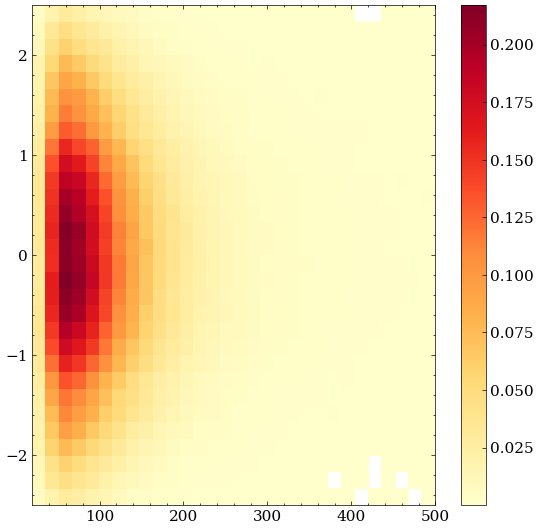

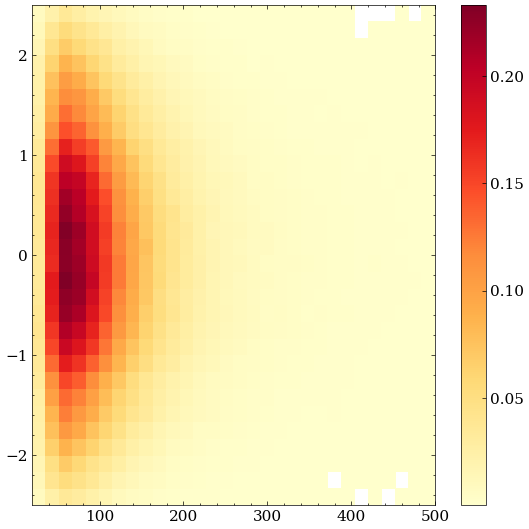

In [48]:
plot_histo2d(h_pass, colorbar=True), plot_histo2d(h_total, colorbar=True)

In [31]:
import traceback


TypeError: print_exception() missing 3 required positional arguments: 'etype', 'value', and 'tb'

In [246]:
pt = np.random.exponential(1000, size=(10000, 4))
eta = np.random.uniform(-3, 3, size=(10000, 4))
mask = (pt > 20) & (np.abs(eta) < 2.5)
pt = ak.from_regular(pt)
eta = ak.from_regular(eta)
mask = ak.from_regular(mask)

pt = pt[mask]
eta = eta[mask]

In [247]:
teff.GetEfficiency(pt, eta)

<Array [[0.935, 0.333, ... 0.883, 0.859]] type='10000 * var * float64'>

In [238]:
ak.prod(teff.GetEfficiency(pt, eta), axis=1)

<Array [0.668, 0.719, 0.8, ... 0.758, 0.623] type='10000 * float64'>

In [185]:
teff

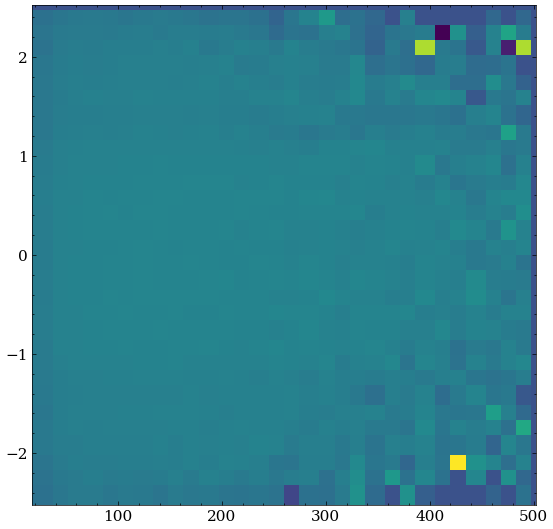

In [186]:
pt = np.linspace(20, 500, 100)
eta = np.linspace(-2.5, 2.5, 100)

X, Y = np.meshgrid(pt, eta)

Z = teff.GetEfficiency(X, Y)

import matplotlib.pyplot as plt
plt.pcolormesh(X, Y, Z)

In [2]:
from numpy import array

In [3]:
bins = np.linspace(375,1500,31)


In [4]:
evan_data = np.array([ 1.28426051,  5.08643034, 18.55151025, 36.75045736, 57.47344375,
       63.45373183, 65.64797212, 66.65072454, 55.80949728, 49.41224194,
       36.9737631 , 34.00643928, 25.15728154, 22.69856856, 23.7200645 ,
       11.87154679, 11.57800899,  8.4710112 ,  6.04467531,  3.01000617,
        1.60844625,  2.11635778,  1.2375996 ,  0.62722564,  0.        ,
        0.68568619,  0.33232426,  0.        ,  0.        ,  0.35691125])

h_evan = Histo(evan_data, bins, label='Evan', color='red', alpha=0.5)

In [5]:
suzs_data = np.array([ 1.2967357   ,
                      5.66660185 ,
                      20.19701546 ,
                      38.73709957 ,
                      58.75787951 ,
                      65.03066063,
                      65.5983877  ,
                      66.5446423  ,
                      56.78572083 ,
                      49.60807116 ,
                      37.82964038 ,
                      33.1596154,
                      25.95976698 ,
                      22.71899631 ,
                      24.0635531  ,
                      12.05290633 ,
                      11.62816975  ,
                      8.70299046,
                      6.24006163  ,
                      3.14840726  ,
                      1.89006811  ,
                      2.5124707   ,
                      1.20781802  ,
                      0.5867685,
                      0.          ,
                      0.83295117  ,
                      0.31392464  ,
                      0.          ,
                      0.          ,
                      0.31658643])

h_suzs = Histo(suzs_data, bins, label='Suzs', color='blue', histtype='step', linewidth=2)

(<Figure size 480x400 with 2 Axes>, <Axes:>)

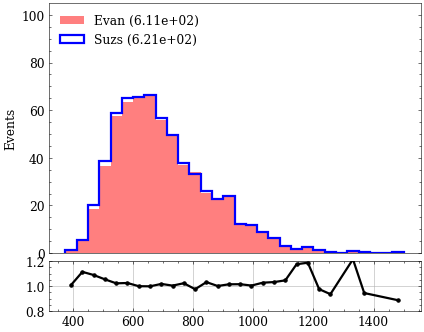

In [6]:
from utils.plotUtils.multi_plotter import _add_new_axis

fig, ax = study.get_figax()
ax, _ = _add_new_axis(ax)
ax, subax = _add_new_axis(ax)

plot_histos([h_evan, h_suzs], figax=(fig, ax), errors=False, legend=True)

ratio = Ratio(h_suzs, h_evan, label='Suzs/Evan', color='black', marker='o', markersize=3)
plot_graph(ratio, figax=(fig, subax), ylim=(0.8,1.2), errors=False, grid=True)

In [7]:
evan_signal = np.array([1.17154683e+00, 7.29548910e+00, 4.94436201e+01, 7.84563535e+01,
       3.25979041e+01, 1.38704755e+01, 7.25487233e+00, 4.45734759e+00,
       3.14847194e+00, 1.84699062e+00, 1.03553781e+00, 1.16908382e+00,
       7.21677028e-01, 4.94425897e-01, 3.60610556e-01, 4.05579880e-01,
       4.54125915e-02, 4.46288334e-02, 4.48971160e-02, 4.51089975e-02,
       4.53851837e-02, 4.50504916e-02, 0.00000000e+00, 4.49935678e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

h_evan_signal = Histo(evan_signal, bins, label='Evan', color='red', alpha=0.5, label_stat='mean')

In [8]:
suzs_signal = array([1.17078412e+00, 7.29488516e+00, 4.94424896e+01, 7.84399872e+01,
       3.26007690e+01, 1.38688354e+01, 7.24961853e+00, 4.45783997e+00,
       3.15200806e+00, 1.84617615e+00, 1.03565979e+00, 1.17074585e+00,
       7.20458984e-01, 4.95315552e-01, 3.60229492e-01, 4.05258179e-01,
       4.50286865e-02, 4.50286865e-02, 4.50286865e-02, 4.50286865e-02,
       4.50286865e-02, 4.50286865e-02, 0.00000000e+00, 4.50286865e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

h_suzs_signal = Histo(suzs_signal, bins, label='Suzs', color='blue', histtype='step', linewidth=2, label_stat='mean')

(<Figure size 480x400 with 2 Axes>, <Axes:>)

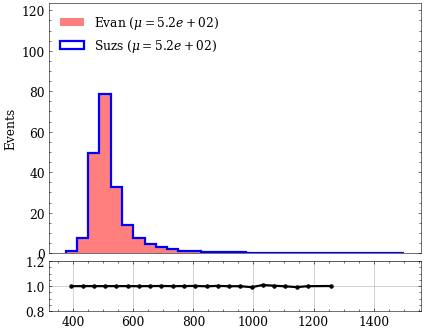

In [9]:
from utils.plotUtils.multi_plotter import _add_new_axis

fig, ax = study.get_figax()
ax, _ = _add_new_axis(ax)
ax, subax = _add_new_axis(ax)

plot_histos([h_evan_signal, h_suzs_signal], figax=(fig, ax), errors=False, legend=True)

ratio = Ratio(h_suzs_signal, h_evan_signal, label='Suzs/Evan', color='black', marker='o', markersize=3)
plot_graph(ratio, figax=(fig, subax), ylim=(0.8,1.2), errors=False, grid=True)

In [57]:
from numpy import array

(<Figure size 650x650 with 1 Axes>, <AxesSubplot:ylabel='Events'>)

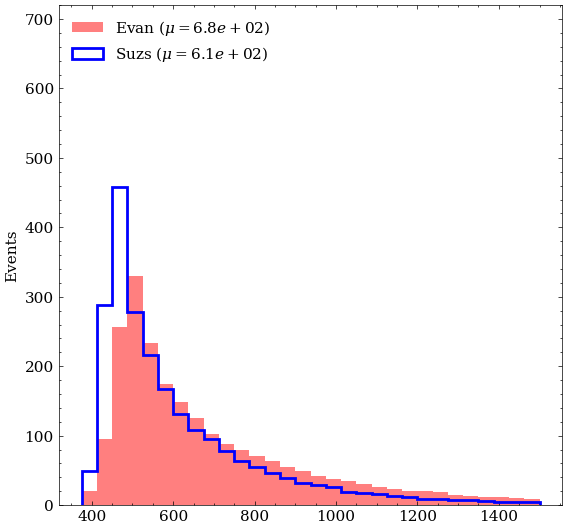

In [62]:
evan_sig = np.array([ 21.07173083,  95.36261539, 257.12659956, 329.77005203,
       233.71078024, 173.90113954, 148.1046044 , 125.03478225,
       102.72802491,  88.65796757,  79.60078294,  70.35855468,
        64.21668407,  55.5775183 ,  49.45070611,  41.96461589,
        38.22619344,  35.11274283,  29.88985944,  26.03035945,
        23.28570691,  20.4811094 ,  20.54312005,  19.31575309,
        15.30982484,  13.01477229,  12.15585658,  11.61415966,
        10.99397259,   9.49741791])

suzs_sig = array([ 48.63217163, 288.57217407, 457.60140991, 278.46160889,
       215.62536621, 166.7076416 , 130.58239746, 108.91625977,
        94.99768066,  78.64672852,  62.9263916 ,  55.40405273,
        46.35021973,  38.39611816,  32.25390625,  28.79492188,
        25.56054688,  19.54101562,  17.65429688,  16.21679688,
        12.66796875,  11.72460938,   9.5234375 ,   8.75976562,
         7.27734375,   7.09765625,   6.06445312,   4.80664062,
         4.26757812,   4.04296875])

h_evan = Histo(evan_sig, bins, label='Evan', color='red', alpha=0.5, label_stat='mean', )
h_suzs = Histo(suzs_sig, bins, label='Suzs', color='blue', histtype='step', linewidth=2, label_stat='mean',)

plot_histos([h_evan, h_suzs], errors=False, legend=True)

In [13]:
signal = array([3.01701903e+00, 4.59754601e+01, 1.03340851e+02, 2.82780151e+01,
       1.07618561e+01, 5.58355713e+00, 2.61166382e+00, 1.66606140e+00,
       1.21577454e+00, 7.20458984e-01, 4.95315552e-01, 9.00573730e-02,
       9.00573730e-02, 4.50286865e-02, 9.00573730e-02, 0.00000000e+00,
       4.50286865e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

data = array([ 1.23091837,  5.39852305, 19.94572169, 38.36494462, 59.05424331,
       64.8264414 , 65.34047361, 65.99908044, 56.58378734, 49.03899795,
       37.4822367 , 32.664299  , 26.01532989, 22.72593008, 23.84219076,
       12.25826776, 11.68355186,  8.78149771,  6.21416831,  3.13416264,
        1.86369517,  2.55946137,  1.18553467,  0.61034479,  0.        ,
        0.85192748,  0.31808102,  0.        ,  0.        ,  0.33680097])

error = array([0.62370849, 1.37989717, 2.54448948, 3.47066645, 4.27043445,
       4.46714635, 4.44998085, 4.42630347, 4.16361913, 3.86481928,
       3.37931551, 3.17544223, 2.90614883, 2.73354294, 2.75714961,
       1.99595883, 1.9863658 , 1.68207016, 1.44951549, 1.00443799,
       0.8421833 , 1.00333958, 0.61526845, 0.4326827 , 0.        ,
       0.6037968 , 0.31808102, 0.        , 0.        , 0.33680097])

h_bkg = Histo(data, bins, label='Bkg Model', color='lavender', error=error)
h_signal = Histo(signal, bins, label='Signal', color='red', histtype='step')

suzs_model = Model(h_signal, h_bkg)

In [31]:
signal = array([1.17154683e+00, 7.29548910e+00, 4.94436201e+01, 7.84563535e+01,
       3.25979041e+01, 1.38704755e+01, 7.25487233e+00, 4.45734759e+00,
       3.14847194e+00, 1.84699062e+00, 1.03553781e+00, 1.16908382e+00,
       7.21677028e-01, 4.94425897e-01, 3.60610556e-01, 4.05579880e-01,
       4.54125915e-02, 4.46288334e-02, 4.48971160e-02, 4.51089975e-02,
       4.53851837e-02, 4.50504916e-02, 0.00000000e+00, 4.49935678e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])
data = array([ 1.28426051,  5.08643034, 18.55151025, 36.75045736, 57.47344375,
       63.45373183, 65.64797212, 66.65072454, 55.80949728, 49.41224194,
       36.9737631 , 34.00643928, 25.15728154, 22.69856856, 23.7200645 ,
       11.87154679, 11.57800899,  8.4710112 ,  6.04467531,  3.01000617,
        1.60844625,  2.11635778,  1.2375996 ,  0.62722564,  0.        ,
        0.68568619,  0.33232426,  0.        ,  0.        ,  0.35691125])
error = array([0.64339776, 1.28846819, 2.33080416, 3.28720122, 4.1148884 ,
       4.3314544 , 4.42830139, 4.44133655, 4.07703295, 3.86675866,
       3.30814538, 3.30633164, 2.79368074, 2.69074203, 2.73090326,
       1.93695955, 1.94314783, 1.62603123, 1.37204374, 0.96850126,
       0.72076485, 0.80354896, 0.62674939, 0.4479646 , 0.        ,
       0.49208858, 0.33232426, 0.        , 0.        , 0.35691125])

h_bkg = Histo(data, bins, label='Bkg Model', color='olive', error=error, alpha=0.5)
h_signal = Histo(signal, bins, label='Signal', color='blue', histtype='step')

evan_model = Model(h_signal, h_bkg)

In [32]:
get_upperlimits = f_upperlimit(poi=np.linspace(0.1,5,50))

result = ObjIter([evan_model, suzs_model]).apply(get_upperlimits)

In [33]:
evan_res, suzs_res = result

In [36]:
evan_res

(DeviceArray(0.12901884, dtype=float64),
 [DeviceArray(0.06752571, dtype=float64),
  DeviceArray(0.09158158, dtype=float64),
  DeviceArray(0.12901884, dtype=float64),
  DeviceArray(0.18290862, dtype=float64),
  DeviceArray(0.25115557, dtype=float64)])

(<Figure size 960x400 with 2 Axes>, <AxesSubplot:ylabel='Events'>)

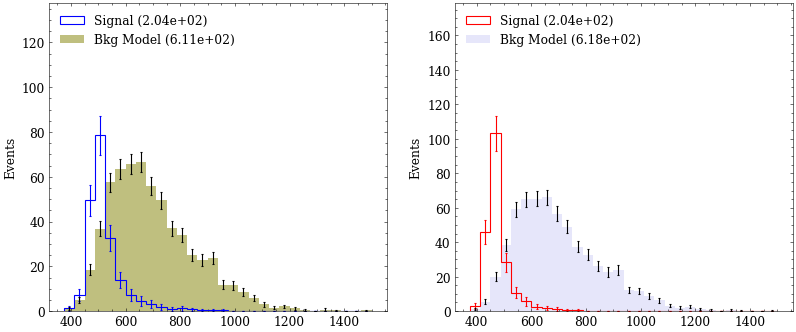

In [35]:
fig, axs = study.get_figax(2)

plot_model(evan_model, figax=(fig, axs[0]), legend=True)
plot_model(suzs_model, figax=(fig, axs[1]), legend=True)